In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 3.9 MB/s 
     |████████████████████████████████| 186 kB 52.4 MB/s 
     |████████████████████████████████| 1.2 MB 37.6 MB/s 
     |████████████████████████████████| 46 kB 3.5 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 51 kB 269 kB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np
import fastai.tabular.all as ft
import random
from math import sin,cos,tan,log,exp

comparte una imagen de una red neuronal que lo haga super bien en DOS intervalos disjuntos pero mal en el medio :) (tendrás que modificar un poco el RealFuncDataset).

In [ ]:
class RealFuncDataset:
    def __init__(self, a, b, c, d, f, n=1024*16):
        #self.a,self.b = a,b
        self.a, self.b, self.c, self.d = a, b, c, d
        self.f = f
        self.n = n
        
    def __len__(self):
        return self.n
    
    def __getitem__(self, i):
        #a,b,f = self.a, self.b, self.f
        a,b,c,d,f = self.a, self.b, self.c,self.d,self.f
        x = random.uniform(a,b)
        xx = random.uniform(c,d)
        X = random.choice([x,xx])
        return torch.tensor([X],dtype=torch.float32),torch.tensor([f(X)],dtype=torch.float32)

In [ ]:
a,b = -5,5
f = np.sin
f2 = np.cos
c, d, = 10, 20

In [ ]:
dls = ft.DataLoaders.from_dsets(RealFuncDataset(a,b,c,d,f), RealFuncDataset(a,b,c,d,f))

In [ ]:
class Shaper(nn.Module):
    def __init__(self, c):
        super().__init__()
        self.c = c
    def forward(self, x):
        return x.view(-1,self.c).float()

In [ ]:
model = nn.Sequential(
    Shaper(1),
    nn.Linear(1,256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Linear(256,256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Linear(256,256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Linear(256,256),
    nn.BatchNorm1d(256),
    nn.Linear(256,256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Linear(256,1)
)

In [ ]:
learn = ft.Learner(dls, model, loss_func=ft.MSELossFlat(),  opt_func=ft.ranger)

In [ ]:
learn.fit_one_cycle(5, div=2, pct_start=0.5)

epoch,train_loss,valid_loss,time
0,0.161109,0.081942,00:06
1,0.149641,0.049803,00:06
2,0.137821,0.025357,00:06
3,0.096747,0.033307,00:06
4,0.087718,0.025101,00:06


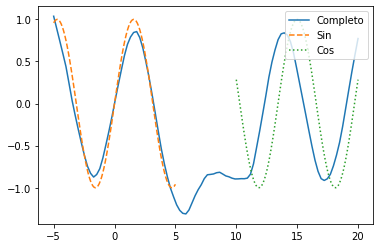

In [ ]:
# Puntos
x = torch.linspace(a, b, 100)
x1 = torch.linspace(c, d, 100)
X = torch.linspace(a, d, 100)
YP = learn.model(X) 
X, YP = X.detach().numpy(), YP.detach().numpy()

# Predicciones
yp = learn.model(x)
yp1 = learn.model(x)

x, yp = x.detach().numpy(), yp.detach().numpy()
y = f(x) # Sen
y1 = f2(x) #Cos

#plt.plot(x, yp, label="Predicción Cos") # Predict Sin
#plt.plot(x1, yp1, label="Predicción Sin") # Predict Sin
plt.plot(X, YP, label="Completo")
plt.plot(x, y, linestyle = 'dashed', label="Sin") #Sin
plt.plot(x1, y1, linestyle = 'dotted', label="Cos") #Cos
plt.legend(loc = 'upper right')
plt.show()

Recordemos que los intervalos elegidos han sido de [-5, 5] y de [10, 20].
Podemos observar que donde el intervalo no fue elegido para entrenamiento la predicción es pesima pero en el intervalo [10, 20] Se trata de ajustar aunque de una manera desfazada a la función. 
